# PyTorch Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [5]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100,1,1,1,0.066507
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200,0,0,0,0.075819


In [6]:
dataset.shape

(1170, 10)

In [7]:
import torch

X = torch.Tensor(dataset[['Open']].values)
y = torch.Tensor(dataset[['Adj Close']].values)

In [8]:
in_features = 1 # number of independent variables
out_features = 1 # dimension of predicted variables
# bias is default true and can be skipped
model = torch.nn.Linear(in_features=in_features, out_features=out_features, bias=True)

In [9]:
mse_loss = torch.nn.MSELoss()




In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [11]:
n_epoch = 500
for i in range(n_epoch):
    # predict model with current regression parameters
    # forward pass (feed the data to model)
    y_pred = model(X)
    # calculate loss function
    step_loss = mse_loss(y_pred, y)
        
    # Backward to find the derivatives of the loss function with respect to regression parameters
    # make any stored gradients to zero
    # backward pass (go back and update the regression parameters to minimize the loss)
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regression parameters 
    optimizer.step()
    print ('epoch [{}], Loss: {:.2f}'.format(i, step_loss.item()))


epoch [0], Loss: 7.77
epoch [1], Loss: 1.78
epoch [2], Loss: 0.48
epoch [3], Loss: 0.20
epoch [4], Loss: 0.14
epoch [5], Loss: 0.13
epoch [6], Loss: 0.12
epoch [7], Loss: 0.12
epoch [8], Loss: 0.12
epoch [9], Loss: 0.12
epoch [10], Loss: 0.12
epoch [11], Loss: 0.12
epoch [12], Loss: 0.12
epoch [13], Loss: 0.12
epoch [14], Loss: 0.12
epoch [15], Loss: 0.12
epoch [16], Loss: 0.12
epoch [17], Loss: 0.11
epoch [18], Loss: 0.11
epoch [19], Loss: 0.11
epoch [20], Loss: 0.11
epoch [21], Loss: 0.11
epoch [22], Loss: 0.11
epoch [23], Loss: 0.11
epoch [24], Loss: 0.11
epoch [25], Loss: 0.11
epoch [26], Loss: 0.11
epoch [27], Loss: 0.11
epoch [28], Loss: 0.11
epoch [29], Loss: 0.11
epoch [30], Loss: 0.11
epoch [31], Loss: 0.10
epoch [32], Loss: 0.10
epoch [33], Loss: 0.10
epoch [34], Loss: 0.10
epoch [35], Loss: 0.10
epoch [36], Loss: 0.10
epoch [37], Loss: 0.10
epoch [38], Loss: 0.10
epoch [39], Loss: 0.10
epoch [40], Loss: 0.10
epoch [41], Loss: 0.10
epoch [42], Loss: 0.10
epoch [43], Loss: 0.1

In [12]:
# bias b (y-intercept)
print("y-intercept:", model.bias.item())
# weight (w)
print("weight:", model.weight.item())



y-intercept: -0.017851166427135468
weight: 1.001890778541565


In [13]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred.detach().numpy())

0.9976532042733818

In [14]:
from bioinfokit import visuz

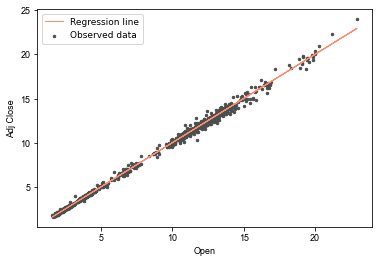

In [15]:
y_pred = model(X).detach()
dataset['yhat']=y_pred.numpy()
visuz.stat.regplot(df=dataset, x='Open', y='Adj Close', yhat='yhat', show=True)

In [16]:
y_pred = model(torch.tensor([[22.290001]], dtype=torch.float32)).detach()
y_pred.item()

22.314294815063477